#RAFIDIOADIBTA_202231031

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
file_path = 'sales(in).csv'
df_sales = pd.read_csv(file_path)

columns_to_use = ['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8']
data_for_clustering = df_sales[columns_to_use]

In [3]:
data_for_clustering = data_for_clustering.dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

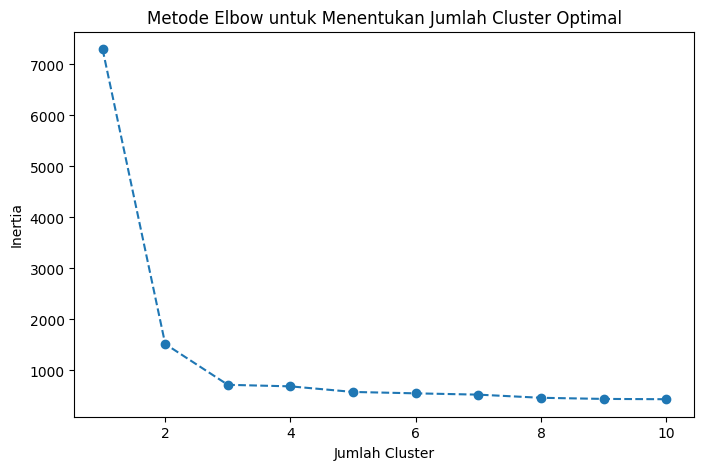

In [4]:

inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

#RAFIDIOADIBTA_202231031

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

df_sales['Cluster'] = clusters

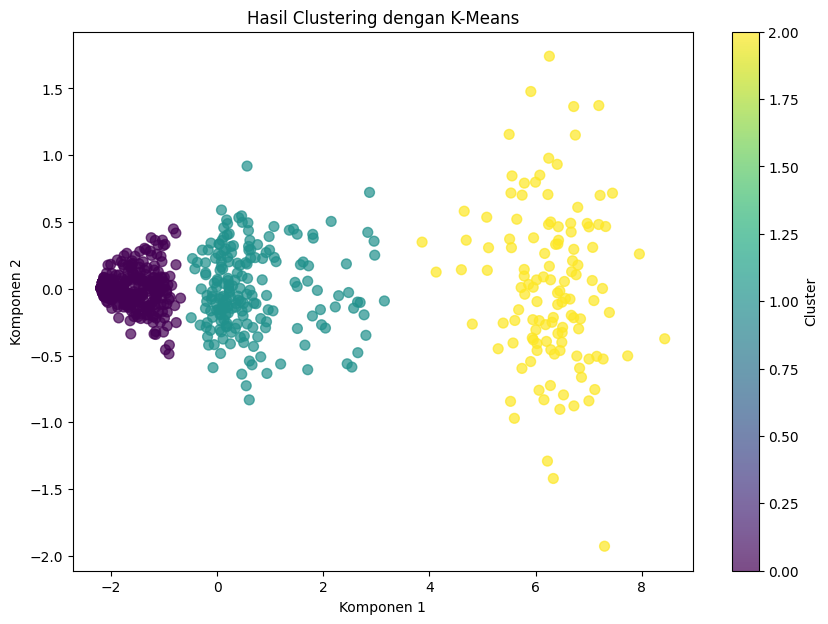

In [6]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()

In [7]:
output_file = 'sales_with_clusters.xlsx'
df_sales.to_excel(output_file, index=False)
print(f"Hasil clustering telah disimpan dalam {output_file}")

Hasil clustering telah disimpan dalam sales_with_clusters.xlsx
